## Import Packages

In [3]:
def helper_display_img(image, title):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

In [2]:
pip install opencv-python torch torchvision numpy ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 7.8 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Download Dataset

In [ ]:
# This is a URL and not Python code.  No correction needed.
# To download the file, you might use the following in a shell:
!wget https://drive.google.com/uc?export=download&id=1eY91ruqdbErlyHYCjxBfEbtSrZsplNug

--2024-10-31 10:42:45--  https://drive.google.com/uc?export=download
Resolving drive.google.com (drive.google.com)... 142.250.141.102, 142.250.141.113, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.102|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2024-10-31 10:42:45 ERROR 400: Bad Request.



# YOLO v8

In [5]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 97.4MB/s]


## Implementasi ke Video

Video Detection with YOLOv8 and Saving Results



In [ ]:
path = r"/content/Pedestrian on roads_ Being cautious is the key to safety __ Cyberabad Traffic Police.mp4"
output_video_path = '/content/output_video.mp4'

cap = cv2.VideoCapture(path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Set up the video writer for output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    results = model.predict(frame, conf=0.5)  # Adjust confidence threshold if needed

    # Plot detection boxes on the frame
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()


0: 384x640 4 cars, 1 truck, 217.7ms
Speed: 2.1ms preprocess, 217.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 200.8ms
Speed: 1.8ms preprocess, 200.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 208.2ms
Speed: 2.5ms preprocess, 208.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 213.2ms
Speed: 1.9ms preprocess, 213.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 bus, 226.7ms
Speed: 2.7ms preprocess, 226.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 216.3ms
Speed: 3.5ms preprocess, 216.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 1 bus, 1 truck, 231.1ms
Speed: 5.5ms preprocess, 231.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 1 tr

In [ ]:
from IPython.display import display, HTML
import base64  # Import the base64 module

# Function to convert the video to HTML5 format for display in Colab
def display_video(video_path):
    mp4 = open(video_path, 'rb').read()
    data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()  # Use base64.b64encode
    return HTML(f"""
        <video width=500 controls>
            <source src="{data_url}" type="video/mp4">
        </video>
    """)

# Display the video
display_video(output_video_path)

Output hidden; open in https://colab.research.google.com to view.

## With Camera

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Capture Image

<IPython.core.display.Javascript object>


0: 480x640 1 person, 195.1ms
Speed: 3.1ms preprocess, 195.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


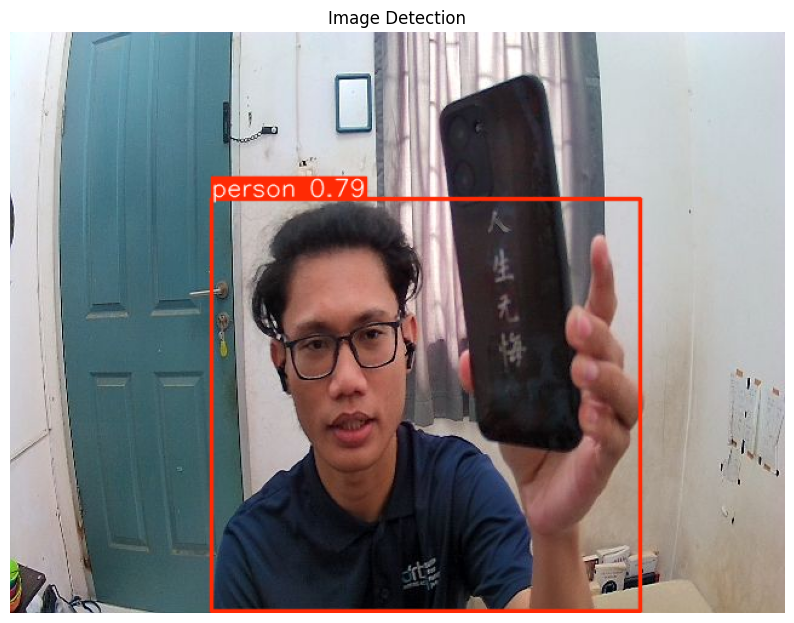

In [9]:
from IPython.display import Image
try:
    # Load YOLOv8 model
    model = YOLO('yolov8n.pt')

    # Capture an image and save it
    filename = take_photo()

    # Load the captured image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run YOLOv8 detection on the image
    results = model(img)

    #print('Saved to {}'.format(filename))
    # Plot the results using matplotlib
    plt.figure(figsize=(10, 10))
    #plt.imshow(results[0].plot())  # Annotated image with detection boxes
    helper_display_img(results[0].plot(), 'Image Detection')


except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

## Realtime using Camera

Since Colab does not support real-time video from a webcam, this approach allows you to capture individual frames and process them with YOLOv8, simulating a "real-time" detection experience in Colab.